# Import libraries

In [7]:
from warnings import filterwarnings
filterwarnings("ignore") # Unnecessary warnings ignore
import pandas as pd # pandas library

# Import data 

In [8]:
startups = pd.read_csv("E:/ETLHIVE/ROUGH/50startups.csv") # from database import datafile

In [9]:
# startups.head() #check first 5 rows
# startups.tail() #check last 5 rows
# startups.sample(10) # check random sample for explore data

# Exploratory data analysis

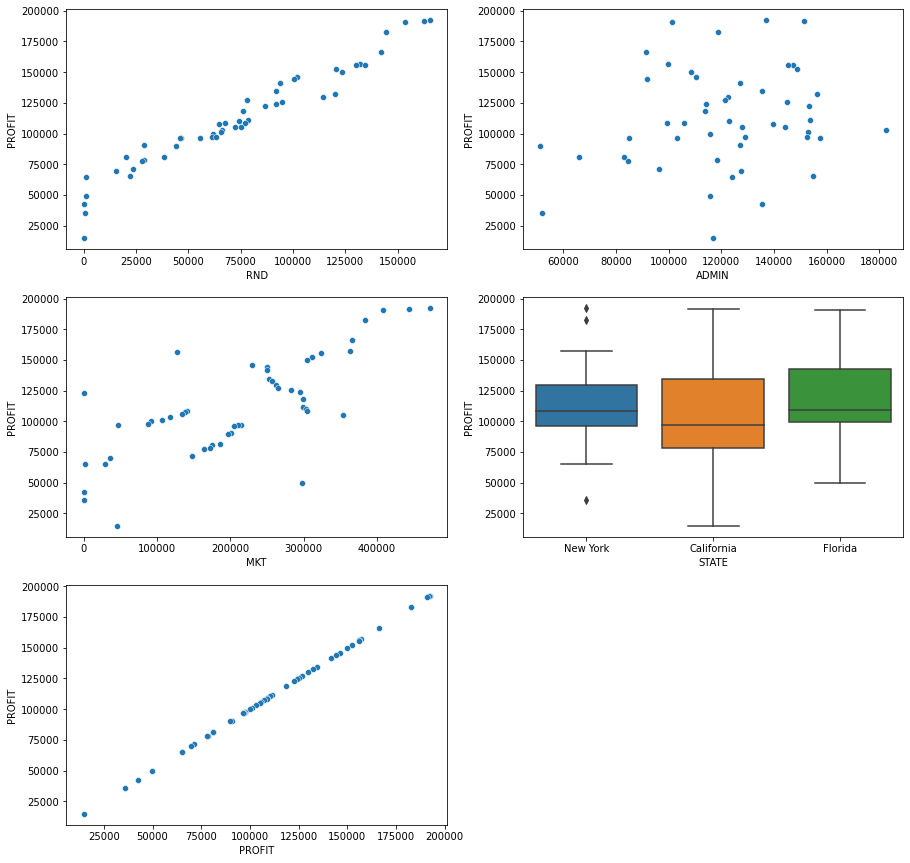

In [10]:
from seaborn import boxplot,scatterplot
from matplotlib.pyplot import plot,subplot,figure
m = 1
figure(figsize=(15,15))
for i in startups.columns:
    if(startups[i].dtypes == "object"):
        subplot(3,2,m)
        boxplot(startups[i],startups.PROFIT) 
        m = m + 1
    else:
        subplot(3,2,m)
        scatterplot(startups[i],startups.PROFIT)
        m = m + 1

In [27]:
def EDA(df):
    import seaborn as sb
    import matplotlib.pyplot as plt
    cat = []
    con = []
    for i in df.columns:
        if( df[i].dtypes =="object"):
            cat.append(i)
        else:
            con.append(i)
    for i in df[con]:
        sb.boxplot(df[i],color ="g") # observe outliers,mean,min,max,25%,75% in specific feature
        plt.show()
    
        sb.distplot(df[i],color ="r") # observe skew & distribution of population
        plt.show()

    
    for i in df[cat]:
        sb.countplot(df[i],palette = "husl") # count each category in feature  
        plt.show()

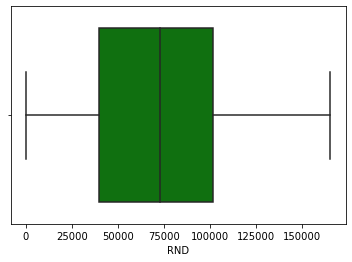

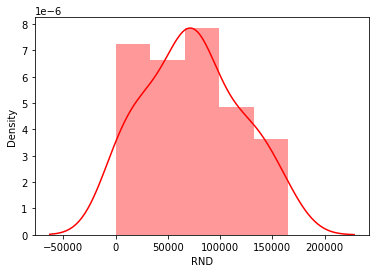

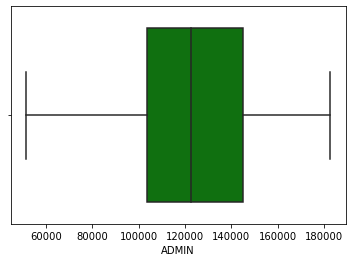

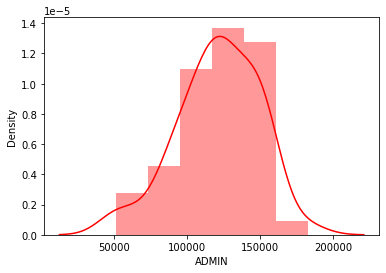

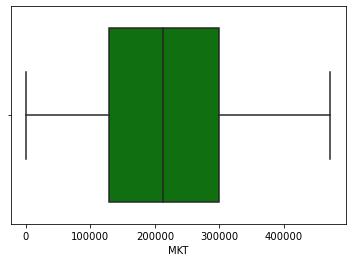

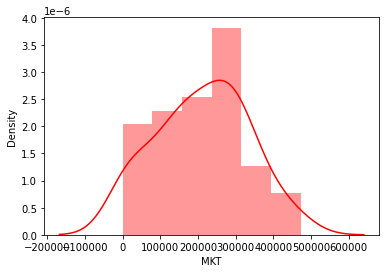

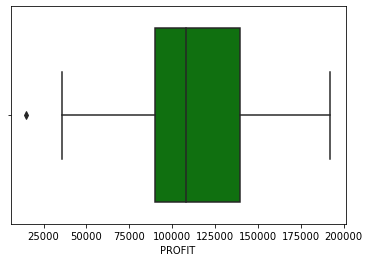

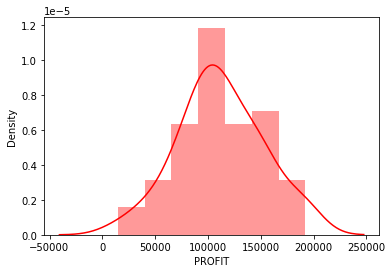

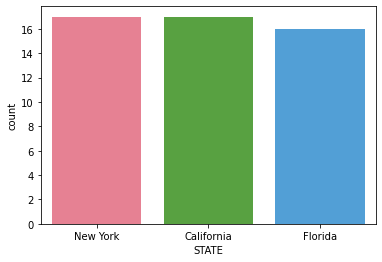

In [28]:
EDA(startups)

In [37]:
startups.corr()[["PROFIT"]].sort_values(by = ["PROFIT"],ascending = False) # checking correlation of features -1 to +1 

,PROFIT
PROFIT,1.000000
RND,0.972900
MKT,0.747766
ADMIN,0.200717


# Define X & Y variable

In [38]:
X = startups[["RND"]] # independent features
Y = startups[["PROFIT"]] # dependent features

# Divide the data in training and testing set

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2,random_state = 21) # splitting data in train & test

In [41]:
print(xtrain.shape) # checking shape of splitted data
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(40, 1)
(40, 1)
(10, 1)
(10, 1)


# Create Regression Model

In [42]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # lm = Linear Regression model object

# Training the Regression Model

In [43]:
model = lm.fit(xtrain,ytrain)
# results of regression stored in model
# fit() used for training the model

# Find b0 | b1 to get regression results

In [51]:
b0 =  model.intercept_[0] # Y intercept

In [52]:
b1 = model.coef_[0][0] # slope  of model

# Create predictions on test data

1. Manual Method
2. predict() method

# Manual method

In [57]:
results = xtest

In [58]:
# Giving column names to the respective features
results["Y_intercept"]=b0
results["Slope"]=b1
results["pred_Profit"]=b0+b1*results.RND
results["Actual_PROFIT"]=ytest

In [59]:
results

,RND,Y_intercept,Slope,pred_Profit,Actual_PROFIT
7,130298.13,49320.113624,0.856323,160897.399592,155752.60
44,22177.74,49320.113624,0.856323,68311.422541,65200.33
43,15505.73,49320.113624,0.856323,62598.026901,69758.98
25,64664.71,49320.113624,0.856323,104693.992280,107404.34
14,119943.24,49320.113624,0.856323,152030.269092,132602.65
2,153441.51,49320.113624,0.856323,180715.608254,191050.39
23,67532.53,49320.113624,0.856323,107149.772514,108733.99
31,61136.38,49320.113624,0.856323,101672.602139,97483.56
17,94657.16,49320.113624,0.856323,130377.217132,125370.37
47,0.00,49320.113624,0.856323,49320.113624,42559.73


# Predict() method

In [60]:
xtest = xtest[["RND"]]

In [61]:
pred = model.predict(xtest) # predict values

In [62]:
xtest["Predicted_Profit"]=pred
xtest["Actual_Profit"]=ytest

In [63]:
xtest

,RND,Predicted_Profit,Actual_Profit
7,130298.13,160897.399592,155752.60
44,22177.74,68311.422541,65200.33
43,15505.73,62598.026901,69758.98
25,64664.71,104693.992280,107404.34
14,119943.24,152030.269092,132602.65
2,153441.51,180715.608254,191050.39
23,67532.53,107149.772514,108733.99
31,61136.38,101672.602139,97483.56
17,94657.16,130377.217132,125370.37
47,0.00,49320.113624,42559.73


# Find error|loss

# Testing Error

In [64]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred) # loss| error in actual & predicted

6543.008416944328

# Make a Prediction on any real value of RND

In [65]:
q = int(input("Enter the value of RND: "))
p = b0+b1*q
print("Predicted PROFIT will be %.2f"%p)

Enter the value of RND: 45218
Predicted PROFIT will be 88041.33


In [66]:
print("Actual Profit can vary from %.2f to %.2f"%(p-5985.15,p+5985.15))

Actual Profit can vary from 82056.18 to 94026.48


In [67]:
print("Actual Profit can vary from",p-5985.15,"to",p+5985.15)

Actual Profit can vary from 82056.17717412865 to 94026.47717412864


In [68]:
e = 17.783412
print("the value of e is %f"%e)
print("the value of e is %.2f"%e)
print("the value of e is %.3f"%e)

the value of e is 17.783412
the value of e is 17.78
the value of e is 17.783


# Plot results of regression:

1. seaborn
2. matplotlib

<AxesSubplot:xlabel='RND', ylabel='PROFIT'>

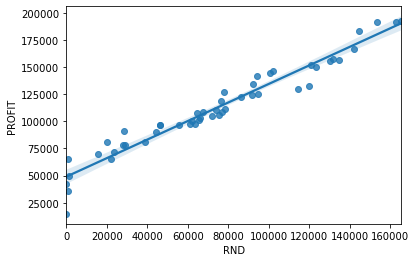

In [69]:
from seaborn import regplot
regplot(X.RND,Y.PROFIT) # regression plot

Text(0.5, 1.0, 'Regression line between RND and Profit')

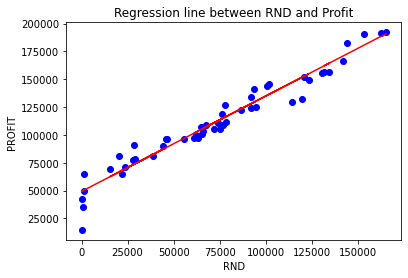

In [71]:
from matplotlib.pyplot import plot,scatter,xlabel,ylabel,title
scatter(X.RND,Y.PROFIT,c = "blue") # Scatterplot
plot(X.RND,b0+b1*X.RND,c = "red")
xlabel("RND")
ylabel("PROFIT")
title("Regression line between RND and Profit")

# Here we have solved the problem for predicting how much should be invested in RND then we get how much profit appox.